---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Andrés Jesús Brenes Thomas**
- Carné: **B91261**
- Estudiante: **Kevin Chen Wu**
- Carné: **B92215**
- Estudiante: **Mariana Chung Garita**
- Carné: **B92250**
- Grupo: **1/2**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

## 1. Sistemas M/M/s
De la teoría y de otras literaturas se tienen las siguientes ecuaciones generales para el cálculo de *s* servidores:

- La probabilidad de estado estable 0 $\phi_{0}$ está dado por la siguiente ecuación:
$$
\phi_{0} = \left[\sum_{k=0}^{s-1} \frac{(s\rho)^{k}}{k!}+\frac{(s\rho)^{s}}{s!(1-\rho)}\right]^{-1}
\tag{1}
$$


- En este caso, se asume que la cantidad de personas es mayor o igual a la cantidad de servidores, entonces la expresión para calcular la probabilidad de estado estable $\phi_{i}$ es la siguiente:
$$
\phi_{i} = \frac{s^{s} \rho^{i}}{s!} \phi_{0}
\tag{2}
$$

- Después de investigar sobre los sistemas de colas con múltiples servidores, se encontró que la Probabilidad (de cola) de que hayan *s* personas en fila (*s* es la cantidad no deseada de personas en cola) se calcula con la fórmula C de Erlang, el cual proviene del modelo C de Erlang y dicho modelo es idéntico al modelo M/m/s de Markov [[1](#1)] [[2](#2)] [[3](#3)] [[4](#4)] [[5](#5)]:
$$
P_{Q} = \frac{s^{s} \rho^{s}}{s!(1-\rho)}\phi_{0}
\tag{3}
$$

Se tiene que $\lambda=4/60$, $\nu=0.25/60$ y 50 personas o menos durante el 95\% del tiempo de operación, entonces se desea encontrar la cantidad de servidores necesarios (de forma mínima) que satisfagan tales condiciones. Sin embargo, dado que la expresión de la Probabilidad de cola implica un término $s^{s}$, no es posible hacer el despeje con algébra convencional; además, la fórmula para el cálculo de $\phi_{0}$ también implica la presencia de la variable desconocida $s$, por lo que la forma más optima teniendo a disposición herramientas de programación es mediante la implementación de un código usando for loop para hallar el valor de $s$ y sería el uso de un método de inspección.

Una vez definida el método a usar, se tiene que el valor de $s$ es tal que la probabilidad de tener 51 personas en fila ($P_{Q}$) durante el tiempo de servicio es la parte complementaria de tener 50 personas o menos en fila ($P$), por lo que:
$$
P_{Q} =  1 - P = 1- 0.95 = 0.05
$$

Antes de continuar con la determinación de $s$, se observa que en las expresiones de $\phi_{0}$ y $P_{Q}$ está presente una resta $(1-\rho)$ en el denominador, lo cual esto puede llegar potencialmente a indefinir la fracción y es necesario determinar el valor de $\rho$ y $s$ que pueden indefinir la expresión:
$$
1-\rho \neq 0
$$

$$
1 \neq \rho
$$

$$
1 \neq \frac{\lambda}{s\nu}
$$

$$
s \neq \frac{\lambda}{\nu} = \frac{\frac{4}{60}}{\frac{0.25}{60}} = 16
$$

Se observa que dicho valor está dentro del rango de $[1, 51]$, entonces se va a iterar $s$ desde 1 hasta 51, excluyendo el valor que causa la indefinición.

### Referencias consultadas

#### <a name="1"></a> [1] *Queueing Analysis.* Recuperado de http://bbcr.uwaterloo.ca/~lcai/ece418/Topic2_queue.pdf. Disponible en línea, accesado el 08/12/2021.
#### <a name="2"></a> [2] E. Modiano. *Lectures 5 & 6 Introduction to Queueing Theory.* Recuperado de https://web.mit.edu/modiano/www/6.263/lec5-6.pdf. Disponible en línea, accesado el 08/12/2021.
#### <a name="3"></a>[3] *Poisson processes, Markov chains and M/M/1 queues.* Recuperado de http://users.ece.northwestern.edu/~rberry/ECE454/Lectures/lec5.pdf. Disponible en línea, accesado el 08/12/2021.
#### <a name="4"></a> [4] S. K. Bose. *Basic Queueing Theory M/M/-/- Type Queues.* 2002. Recuperado de http://home.iitk.ac.in/~skb/qbook/Slide_Set_3.PDF. Disponible en línea, accesado el 08/12/2021.
#### <a name="5"></a> [5] E. Chromy, T. Misuth and M. Kavacky. "Erlang C Formula and Its Use In the Call Centers," *INFORMATION AND COMMUNICATION TECHNOLOGIES AND SERVICES,* vol. 9, no. 1, pp. 7-19, Mar. 2002. Recuperado de https://core.ac.uk/download/8987165.pdf. Disponible en línea, accesado el 08/12/2021.

In [1]:
import math

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Parámetro de paro
best_S = False

# Cantidad deseada de personas en fila
c = 50

# Cantidad no deseada de personas en fila
i = c + 1

# Proporción del tiempo de servicio donde no hay más de 50 personas en fila
P = 0.95

# Proporción del tiempo de servicio donde hay más de 50 personas en fila
P_c = 1 - P

# Valor de s mínimo, el valor predeterminado es 1
opt_s = 1

# Se observa que para Φ0 tiene una resta en el denominador de una de sus
# fracciones, por lo que puede llegar a indefinirse, 1 - ρ = 0, ρ = λ/(s*v)

s_indef = lam/nu

# Ya que hay un posible valor que podrá indefinir Φ0, se crea una lista
# para iterar sobre s, la cual irá desde 1 hasta i (números enteros) y
# excluyendo el valor que genera la indefinición

list_s = [x for x in range(1, i+1)]
list_s.remove(s_indef)

# Se itera s con la lista creada
for s in list_s:

    # Se pregunta si ya se encontró el s mínimo con los requerimientos dados
    if not best_S:

        # Parámetro de estabilidad
        rho = lam / (s * nu)

        # Se calcula primero el Φ0 para cada s
        suma = 0
        for k in range(0, s):
            suma += (s * rho) ** (k) / math.factorial(k) \
                + (s * rho) ** (s) / (math.factorial(s) * (1 - rho))
        phi_0 = 1/suma

        # Se calcula la probabilidad de no tener más de 50 en fila
        prob = phi_0 * (s * rho) ** (s) / (math.factorial(s) * (1 - rho))

        # Se comprueba si es igual o mejor que el valor exigido
        if (P_c >= prob and prob >= 0):
            best_S = True
            opt_s = s
            print('El valor de s encontrado es: {}'.format(opt_s))
            print('La probabilidad de cola asociada es: {:.05f}'.format(prob))


El valor de s encontrado es: 19
La probabilidad de cola asociada es: 0.04836


## 2.Corroboración del resultado obtenido

Para una cantidad de 19 servidores se tiene: 
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.91 horas.


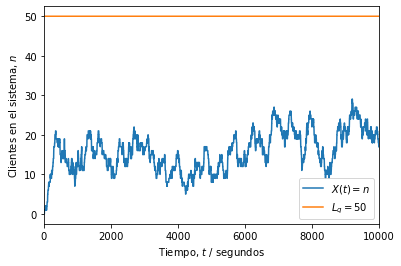

In [2]:
# Se simulará un primer caso para cuando se cumplan las condiciones.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Cantidad de servidores
s = 19

# Vector de servidores
server = np.zeros(s)

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale=1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale=1/(nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Primer Cliente
server[0] = fin

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    libres = np.where(server <= t_llegadas[i])[0]
    if libres.size == 0:
        # No hay servidores libres, el incio sería
        inicio = min(server) + 1
        # el fin del tiempo sería:
        fin = inicio + t_servicio[i]
        # El servidor que estará libre
        k = server.tolist().index(min(server))
        # Nuevo valor de salida
        server[k] = fin

    else:
        # Hay servidores libres
        inicio = t_llegadas[i]
        # El tiempo de salida es:
        fin = inicio + t_servicio[i]
        # El servidor que estará libre
        k = libres[0]
        # Nuevo valor de salida
        server[k] = fin
    t_atencion.append(inicio.astype(int))
# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + max(t_servicio) + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c  # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P:
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Para una cantidad de {} servidores se tiene: ".format(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.')
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 10000))
plt.show()


Para una cantidad de 16 servidores se tiene: 
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 49.65%
	 No cumple con la especificación.
Simulación es equivalente a 5.07 horas.


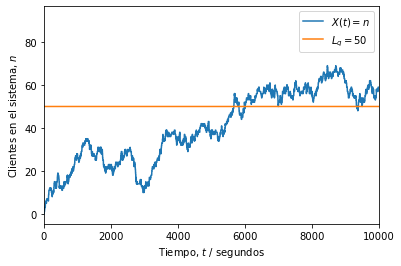

In [3]:
# Se simulará un primer caso para cuando se cumplan las condiciones.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Cantidad de servidores
s = 16

# Vector de servidores
server = np.zeros(s)

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale=1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale=1/(nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Primer Cliente
server[0] = fin

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    libre = np.where(server <= t_llegadas[i])[0]
    if libre.size == 0:
        # No hay servidores libres, el incio sería
        inicio = min(server) + 1
        # el fin del tiempo sería:
        fin = inicio + t_servicio[i]
        # El servidor que estará libre
        k = server.tolist().index(min(server))
        # Nuevo valor de salida
        server[k] = fin

    else:
        # Hay servidores libres
        inicio = t_llegadas[i]
        # El tiempo de salida es:
        fin = inicio + t_servicio[i]
        # El servidor que estará libre
        k = libre[0]
        # Nuevo valor de salida
        server[k] = fin
    t_atencion.append(inicio.astype(int))
# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + max(t_servicio) + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c  # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P:
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Para una cantidad de {} servidores se tiene: ".format(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.')
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 10000))
plt.show()


---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---